# Live Demo

**The task is to link the test dataset "Berlin Income" with hospital dataset of 2015 and calculate a bundle of descriptive statistical measures (Minimum, Maximum, Mean, Standard derivation) on bed numbers within a circle of 2 kilometers.**

## Load functions from SoRa R package
This steps are currently required to load all R functions from /R/ directory. In future, the SoRa R package will be installed directly.

In [36]:
# load R functions from SoRa R Package
path <- "/home/jovyan/R/"
sora_functions  <- dir(path)
for (i in sora_functions) {
  source(paste0(path, i))
}

## Check your changed SORA_API_KEY 
- the environment variable from .Renviron file


In [37]:
#check environment variable for SORA_API_KEY
Sys.getenv("SORA_API_KEY")

[1] "9448b1d9c90db35d8975c24f71c60ee0c2855ee6eaf92eea2a32c23f094331d4de6579c54e51b223658f6769939e64d1380b30f9805bfc9316bef9a7a3ef6217"

## Load, explore and prepare input survey data

In [38]:
load("/home/jovyan/data/ber_income.rda")
head(ber_income)

id,income,x,y
<chr>,<ord>,<dbl>,<dbl>
ID_08939,4500-5000 €,4558400,3278000
ID_29396,3500-4000 €,4549700,3277800
ID_20257,2500-3000 €,4546200,3265100
ID_12550,3000-3500 €,4548100,3268000
ID_22042,4500-5000 €,4542700,3262900
ID_15074,3000-3500 €,4561600,3276700


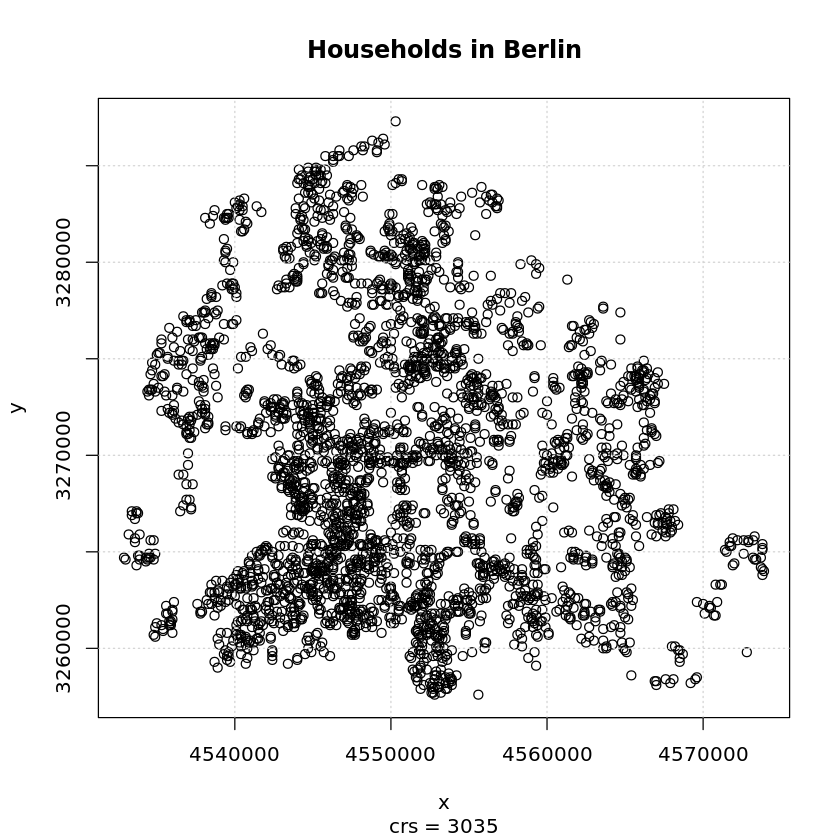

In [39]:
plot(ber_income$x, ber_income$y,
     xlab = "x", ylab = "y",
     main = "Households in Berlin",
     sub = "crs = 3035"
)
grid()

In [40]:
# load survey data and load its coordinate reference system (CRS) LAEA (EPSG Code: 3035)
survey_data <- sora_custom(.data = ber_income, crs = 3035)

### Linking
- hint: 
    - to determine the correct linking parameter, you can either use the online web-interface of the datapicker
    - or read the error messages (after starting a linking job), to get an idea which values are valid

In [41]:
# define geospatial dataset of hospitals (including bed numbers) in 2015
spat_data <- sora_spatial(id = "ioer-monitor-v01rg-2018-1000m")

In [75]:
linking <- sora_linking(
  method = "aggregate_attribute",
  selection_area = "square",
  length = 2000,
  output = c("min", "mean", "max", "sd")
)

In [76]:
job_id_demo <- sora_request(dataset = survey_data, link_to = spat_data, method = linking)

→ The provided coordinates have unique identifiers and are in valid format.
→ The requested sora-provided geospatial dataset is existing.
→ Chosen geospatial dataset: Percentage of transport space to reference area
  (2018, 1000m Raster) from IOER-Monitor (IOER)
→ Chosen linkage: Aggregate attribute within square on raster with numeric
  field - Geocoded Dataset: Vector: Point | Geospatial Dataset: Raster -
  numeric
→ The requested linkage is plausible and fits to the chosen geospatial dataset.
  All provided parameter are valid including its values.
→ All required permissions for accessing the data are available.
→ Total number of provided coordinates: 3000 (valid: 3000, having null values:
  0).
→ Number of coordinates located within the bounding box of geospatial dataset:
  3000 (outside: 0).
→ All required external services are available.


### Get linking result

In [80]:
## check, if your current linking job is done
sora_job_done(job_id_demo)

[1] TRUE

In [86]:
## check status of all your started linking jobs
sora_jobs()

job_id,created_at,status
<chr>,<dttm>,<chr>
IOER-58378b28-d01a-4ef5-8937-dac24ffedce0,2025-06-26 15:42:41,SUCCESSFUL
IOER-0c397813-8bf9-407b-bc39-e02f7e999bc1,2025-06-26 15:21:39,SUCCESSFUL
IOER-99a96b4e-a83d-4346-bbbd-4019b12497f3,2025-06-26 15:15:36,SUCCESSFUL
IOER-709eecb5-8b84-4e4f-be70-a6631f4d32da,2025-06-26 15:12:52,SUCCESSFUL
IOER-3aa4a4e7-9c68-49fa-9b7b-2b0bfb40fcf1,2025-06-26 14:48:17,SUCCESSFUL
IOER-e88ed718-7c75-4351-840d-ba0ef8342ef8,2025-06-26 14:09:35,SUCCESSFUL
IOER-1c279d1c-b02c-4682-a49c-4a6dcc89ad33,2025-06-26 14:05:08,SUCCESSFUL
IOER-f2556f34-d514-4dab-941c-7d90cba61b25,2025-06-26 12:01:31,SUCCESSFUL
IOER-c57b9505-4391-4bf9-aa4e-1bfa13b8567b,2025-06-26 11:26:42,SUCCESSFUL


In [81]:
## get results
sora_calls <- sora_jobs()

if (sora_job_done(job_id_demo)){
  results <- sora_results(job_id = job_id_demo)

  ## print first rows of result
  head(results)
}

→ The requested linkage was successfully executed.


id,area,min,max,mean,sd,count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ID_08939,4e+06,7.921963,19.32834,11.95567,4.542192,4
ID_29396,4e+06,14.565853,20.68298,16.88957,2.284553,4
ID_20257,4e+06,10.835484,26.91161,16.83550,6.601203,4
ID_12550,4e+06,24.971592,33.29517,29.18887,3.891616,4
ID_22042,4e+06,11.680612,17.34531,15.27289,2.151306,4
ID_15074,4e+06,10.620902,19.47660,15.97617,3.279014,4


In [87]:
#merge input survey data and result
linked <- merge(ber_income, results, by = "id")
#linked <- sf::st_as_sf(linked, coords = c("x", "y"), crs = 3035)

In [85]:
## count n for count in linked
table(linked$count)


   4    6    9 
2444  525   31 

### Analyse 

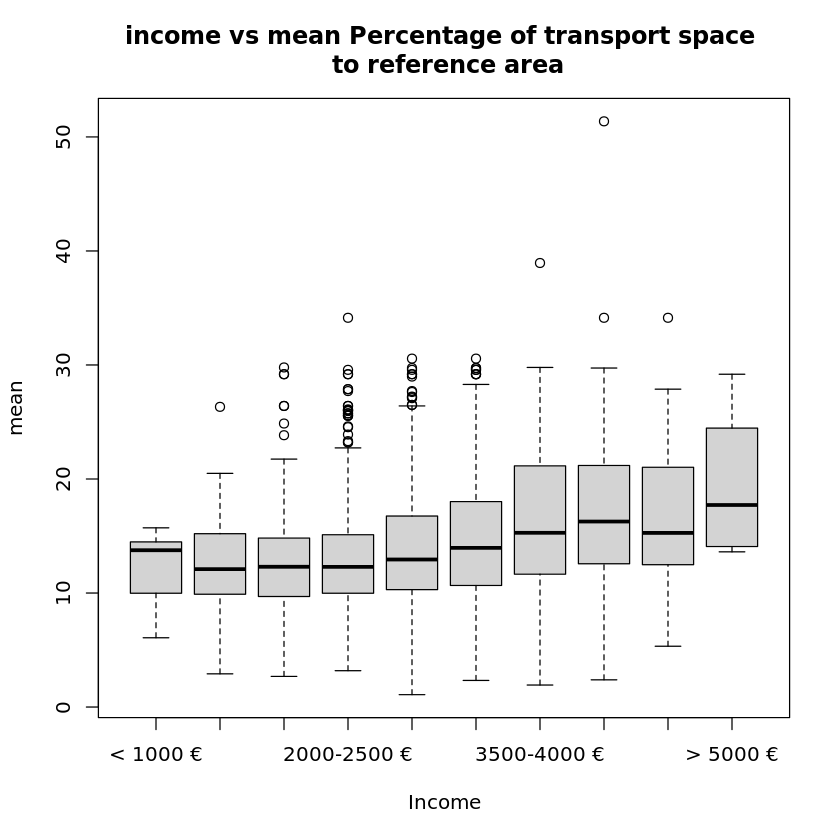

In [88]:
plot(linked$income, linked$mean, main = "income vs mean Percentage of transport space \n to reference area", xlab = "Income", ylab = "mean")
#plot(linked["mean"], pch = 16, main = "Percentage of transport space to reference area")